## Preprocessamento de dados

---

- [1. Importação de módulos e bibliotecas](#importacao-de-modulos-e-bibliotecas)
- [2. Leitura dos dados](#leitura-dos-dados)

<a id="importacao-de-modulos-e-bibliotecas"></a>
## 1. Importação de módulos e bibliotecas 
---

Para realizar o preprocessamento de dados serão feitas as seguintes importações:
- **os** - Este é um módulo que já vem com a instalação padrão do Python. Ele fornece funcionalidades de manipulação de arquivos e diretórios de forma idependente do sistema operacional.


-  **numpy** - Esta é uma biblioteca que possibilita ler, criar e manipular manipular estruturas como vetores e matrizes de múltiplas dimensões. Além disso, a biblioteca `Numpy` possui uma coleção de funções matemáticas que possibilitam trabalhar com essas estruturas.  


- **pandas** - É uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada.

Por convensão, as bibliotecas são importadas no python da seguinte maneira:

In [1]:
import os
import numpy as np
import pandas as pd

<a id="leitura-dos-dados"></a>
## 2. Leitura dos dados

In [9]:
iop1 = pd.read_csv('./data/private/february.csv')
iop2 = pd.read_csv('./data/private/september.csv')
print(iop1.head())
print(iop2.head())

     year  month   day  hour  minute  n_cluster      lon     lat  ind_x  \
0  2014.0    2.0  16.0  19.0    36.0       32.0 -59.6314 -3.8289  138.0   
1  2014.0    2.0  16.0  19.0    36.0       32.0 -59.6114 -3.8289  139.0   
2  2014.0    2.0  16.0  19.0    36.0       32.0 -59.6314 -3.8489  138.0   
3  2014.0    2.0  16.0  19.0    36.0       32.0 -59.6114 -3.8489  139.0   
4  2014.0    2.0  16.0  19.0    36.0       32.0 -59.5914 -3.8489  140.0   

   ind_y  reflect  yyyyy_xx1  yyyyy_xx2  yyyyyyy_xx3  yyy_xx4  yyy_xx5  river  \
0  154.0  22.1094        0.0        0.0          0.0      0.0      0.0    0.0   
1  154.0  20.4531        0.0        0.0          0.0      0.0      0.0    0.0   
2  155.0  21.0781        0.0        0.0          0.0      0.0      0.0    0.0   
3  155.0  22.4844        0.0        0.0          0.0      0.0      0.0    0.0   
4  155.0  20.9375        0.0        0.0          0.0      0.0      0.0    0.0   

   cxe  precipit     vil  
0  2.0    1.5927  0.4738  
1  2.0  

In [12]:
utils_columns = ['day', 'hour', 'minute', 'lon', 'lat', 'reflect', 'precipit', 'yyyyyyy_xx3']
iop1d = iop1[utils_columns]
iop2d = iop2[utils_columns]

In [19]:
lights = iop2d[iop2d['yyyyyyy_xx3'] > 0]
lights2 = iop2d[iop2d['yyyyyyy_xx3'] == 0]

In [20]:
group = lights.groupby('reflect').agg({'precipit': 'sum', 'reflect': 'sum', 'yyyyyyy_xx3': 'sum'})
group2 = lights2.groupby('reflect').agg({'precipit': 'sum', 'reflect': 'sum', 'yyyyyyy_xx3': 'sum'})
group.head()

,precipit,reflect,yyyyyyy_xx3
reflect,,,
19.9688,22.7389,579.0952,38.0
19.9844,22.7194,559.5632,37.0
20.0000,21.2706,540.0000,39.0
20.0156,19.7425,500.3900,35.0
20.0312,22.1648,560.8736,35.0


In [21]:
group2.head()

,precipit,reflect,yyyyyyy_xx3
reflect,,,
19.9688,2080.7145,51779.0984,0.0
19.9844,2029.1125,50460.6100,0.0
20.0000,2085.5541,51760.0000,0.0
20.0156,2161.4387,53541.7300,0.0
20.0312,2078.2832,51319.9344,0.0


In [36]:
n1 = group['precipit'].values.ravel()
n2 = group2['precipit'].values.ravel()

n11 = group['reflect'].values.ravel()
n22 = group2['reflect'].values.ravel()

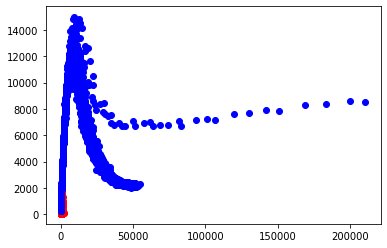

In [39]:
plt.scatter(n11, n1, color='red')
plt.scatter(n22, n2, color='blue')

<a id="cell2"></a>

In [35]:
group

,precipit,reflect,yyyyyyy_xx3
reflect,,,
19.9688,22.7389,579.0952,38.0
19.9844,22.7194,559.5632,37.0
20.0000,21.2706,540.0000,39.0
20.0156,19.7425,500.3900,35.0
20.0312,22.1648,560.8736,35.0
20.0469,20.9905,521.2194,32.0
20.0625,19.8104,481.5000,32.0
20.0781,21.8910,542.1087,29.0
20.0938,18.3839,462.1574,27.0
